## 🚗 Introduction to the Luxury & Performance Car Dataset
#### This dataset showcases a curated selection of high-end and performance-oriented vehicles from some of the world’s most iconic automotive brands. Each entry captures a rich blend of engineering precision, design philosophy, and market positioning—ranging from ultra-luxury sedans to cutting-edge hybrid supercars.
#### 🔍 Key Features Covered:
##### - Brand & Model Identity: From the electrifying Ferrari SF90 Stradale to the stately Rolls Royce Phantom.
##### - Engine Specifications: Including engine type, displacement (cc), and horsepower.
##### - Performance Metrics: Top speed, acceleration (0–100 km/h), and torque.
##### - Market Value: Price ranges reflecting exclusivity and technological sophistication.
##### - Fuel Type & Seating: Offering insights into powertrain diversity and passenger capacity.


#### importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.offline as pyo

import plotly.graph_objects as go
from plotly.subplots import make_subplots


###### Numpy       -Numerical operations, array manipulation, and performance optimization.
###### Pandas      -Data manipulation, cleaning, and tabular analysis.
###### Matplotlib  -Basic plotting (line, bar, scatter, etc.) with full customization.
###### seaborn     -Statistical data visualization with beautiful default styles.
###### Plotly      -Interactive visualizations ,Enables Plotly charts to run locally without needing a web server.
###### Os          -Interacting with the operating system (e.g., file paths, directories).


#### Loading the files

In [2]:
df=pd.read_csv("Cars Datasets 2025.csv",encoding='cp1252')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


##### Data before performinf EDA

In [3]:
df.shape

(1218, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


## Data Cleaning -EDA 

### Renaming the columns

In [5]:
df.rename(columns={"Company Names":"Make","Cars Names":"Model","Total Speed":"Top Speed(Km/h)",
                   "Cars Prices":"Price(in USD)","Performance(0 - 100 )KM/H":"Acceleration(0-100 Km/h in sec)",
                   "Torque":"Torque(Nm)"
                   },inplace=True)

###### Make               - The manufacturer or brand of the car
###### Model              - Specific model name or variant of the car
###### Engine             - Engine type or configuration 
###### CC/Battery Capacity- Engine displacement in cubic centimeters (cc) or battery capacity for EVs.
###### HorsePower         - Power output of the engine, typically in horsepower (hp).
###### Maximum Speed      - Maximum speed the car can achieve, usually in kilometers per hour (km/h).
###### Acceleration       - Acceleration time from 0 to 100 km/h, indicating performance.
###### Price              - Market price or price range of the car, often in USD.
###### Fuel Types         - Type of fuel used
###### Seats              - Number of passenger seats available in the car.
###### Torque             - Rotational force produced by the engine, usually in Newton meters (Nm).

In [6]:
df

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm)
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590 – $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169 – 196 hp,190 km/h,8.0 – 9.2 sec,"$25,210 – $29,135",Gas / Hybrid,5,190 – 210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140 – 198 hp,180 km/h,7.9 – 10.5 sec,"€ 33,000",Hybrid,5,190 – 205 Nm


#### Changing the datatype of Top speed , acceleration


In [7]:
df["Top Speed(Km/h)"]=df["Top Speed(Km/h)"].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [8]:

df["Acceleration(0-100 Km/h in sec)"]=df["Acceleration(0-100 Km/h in sec)"].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df["Price(in USD)"]=df["Price(in USD)"].str.replace(",","").str.extract(r'(\d+\.\d+|\d+)').astype(float)
df["HorsePower"]=df["HorsePower"].str.extract(r'(\d+)').astype(float)


###### --Extracts the numeric speed value (including decimals) from strings
###### --Extracts acceleration time from strings
###### --- Removes commas from prices


In [9]:
df[["Displacement(CC)","Battery Capacity(KWh)"]]=df["CC/Battery Capacity"].str.extract(r'(\d[\d,\.]*)\s*(cc)?', expand=True)
df["Displacement(CC)"]=df["Displacement(CC)"].str.replace(",","").astype(float)

In [10]:
del df["Battery Capacity(KWh)"]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             1218 non-null   object 
 1   Model                            1218 non-null   object 
 2   Engines                          1218 non-null   object 
 3   CC/Battery Capacity              1215 non-null   object 
 4   HorsePower                       1218 non-null   float64
 5   Top Speed(Km/h)                  1218 non-null   float64
 6   Acceleration(0-100 Km/h in sec)  1212 non-null   float64
 7   Price(in USD)                    1217 non-null   float64
 8   Fuel Types                       1218 non-null   object 
 9   Seats                            1218 non-null   object 
 10  Torque(Nm)                       1217 non-null   object 
 11  Displacement(CC)                 1213 non-null   float64
dtypes: float64(5), objec

In [12]:
df.head()

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC)
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800 Nm,3990.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900 Nm,6749.0
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100 - 140 Nm,1200.0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900 Nm,3982.0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560 Nm,5204.0


#### Checking for the null values

In [13]:
df.isna().sum()

Make                               0
Model                              0
Engines                            0
CC/Battery Capacity                3
HorsePower                         0
Top Speed(Km/h)                    0
Acceleration(0-100 Km/h in sec)    6
Price(in USD)                      1
Fuel Types                         0
Seats                              0
Torque(Nm)                         1
Displacement(CC)                   5
dtype: int64

In [14]:
df.shape

(1218, 12)

#### Wrong data in HorsePower column

In [15]:
def is_cc_in_hp(value):
    value = str(value).lower()
    return 'cc' in value or (value.isdigit() and 1000 <= int(value) <= 10000)

# Apply the function
df['Horsepower_has_cc'] = df['HorsePower'].apply(is_cc_in_hp)


##### validator to catch misclassified entries in the HorsePower column—especially those that mistakenly contain engine displacement (cc) values instead of actual horsepower.


In [16]:

df[df['Horsepower_has_cc']]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc


In [17]:
df.shape

(1218, 13)

In [18]:
df[df["CC/Battery Capacity"].isna()]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
97,MERCEDES,BENZ EQS 53,ELECTRIC MOTOR,NaN,751.0,250.0,3.4,102000.0,Electric,5,950 Nm,NaN,False
255,Nissan,Urvan,2.5L Turbo Diese,NaN,2488.0,140.0,14.0,28000.0,Diesel,15,356 Nm,NaN,False
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,NaN,400.0,300.0,NaN,NaN,Petrol (Hybrid),2,NaN,NaN,False


In [19]:
df[df["Acceleration(0-100 Km/h in sec)"].isna()]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
241,TOYOTA,COASTER,"4.0L,DIESEL","4,009 cc",134.0,120.0,NaN,70000.0,Diesel,20,500 Nm,4009.0,False
1096,Mitsubishi,Canter (Truck),3.0L Diesel,"3,000 cc",150.0,120.0,NaN,35000.0,Diesel,2,370 Nm,3000.0,False
1107,Mitsubishi,Fuso Fighter (Truck),7.5L Diesel,"7,500 cc",240.0,120.0,NaN,70000.0,Diesel,2,686 Nm,7500.0,False
1108,Mitsubishi,Fuso Canter Eco Hybrid,3.0L Diesel Hybrid,"3,000 cc",150.0,120.0,NaN,50000.0,Diesel Hybrid,2,370 Nm,3000.0,False
1126,Mitsubishi,Minicab MiEV,Electric Motor,16 kWh battery,64.0,100.0,NaN,18000.0,Electric,2,196 Nm,16.0,False
1147,Mazda,RX-Vision Concept,Rotary SkyActiv-R,NaN,400.0,300.0,NaN,NaN,Petrol (Hybrid),2,NaN,NaN,False


##### Removing a row with index number

In [20]:
df.drop(index=1147,axis=0,inplace=True)

#### Removing the null values 

In [21]:
df.dropna(inplace=True)

#### Checking for the duplicate values 

In [22]:
df.duplicated().sum()

np.int64(5)

In [23]:
df[df.duplicated()]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
336,Volkswagen,Golf Cabriolet,1.2L I4 Turbo / 2.0L I4 Turbo,1197 cc / 1984 cc,105.0,217.0,8.4,30000.0,Petrol,4,200 Nm,1197.0,False
354,Volkswagen,Jetta Hybrid,1.4L I4 Turbo + Electric Motor,1395 cc,170.0,210.0,8.6,28000.0,Hybrid,5,250 Nm,1395.0,False
658,Tata Motors,Tiago EV,Permanent Magnet Synchronous,24 kWh,74.0,120.0,5.7,11000.0,Electric,5,114 Nm,24.0,False
755,Chevrolet,Tahoe RST,5.3L V8 Gasoline,5300 cc,355.0,180.0,7.4,64100.0,Petrol,7,519 Nm,5300.0,False
1018,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100 - 140 Nm,1200.0,False


#### Removing duplicated values by keeping the first rows

In [ ]:
df.drop_duplicates(inplace=True,keep='first')
del df["Horsepower_has_cc"]

In [25]:
df.shape

(1203, 13)

In [26]:
df.columns

Index(['Make', 'Model', 'Engines', 'CC/Battery Capacity', 'HorsePower',
       'Top Speed(Km/h)', 'Acceleration(0-100 Km/h in sec)', 'Price(in USD)',
       'Fuel Types', 'Seats', 'Torque(Nm)', 'Displacement(CC)',
       'Horsepower_has_cc'],
      dtype='object')

#### Changing the data type of Torques

In [27]:
df["Torque(Nm)"]=df["Torque(Nm)"].str.extract(r'(\d+\.\d+|\d+)').astype(int)

In [28]:
df.head()    


,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800,3990.0,False
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900,6749.0,False
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100,1200.0,False
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900,3982.0,False
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560,5204.0,False


In [29]:
df=df.reset_index(drop=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             1203 non-null   object 
 1   Model                            1203 non-null   object 
 2   Engines                          1203 non-null   object 
 3   CC/Battery Capacity              1203 non-null   object 
 4   HorsePower                       1203 non-null   float64
 5   Top Speed(Km/h)                  1203 non-null   float64
 6   Acceleration(0-100 Km/h in sec)  1203 non-null   float64
 7   Price(in USD)                    1203 non-null   float64
 8   Fuel Types                       1203 non-null   object 
 9   Seats                            1203 non-null   object 
 10  Torque(Nm)                       1203 non-null   int64  
 11  Displacement(CC)                 1203 non-null   float64
 12  Horsepower_has_cc   

Data Analysis

In [31]:
df["Fuel Types"].unique()

array(['plug in hyrbrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Petrol/Diesel', 'Plug-in Hybrid', 'Petrol/AWD', 'Petrol/Hybrid',
       'Hydrogen', 'Diesel/Petrol', 'Petrol/EV', 'Hybrid/Electric',
       'Petrol, Hybrid', 'Petrol, Diesel', 'Hybrid (Petrol)',
       'CNG/Petrol', 'Hybrid/Petrol', 'Hybrid (Gas + Electric)',
       'Gas / Hybrid', 'Hybrid / Plug-in'], dtype=object)

In [32]:
df["Seats"].unique()

array(['2', '5', '4', '2+2', '7', '8', '12', '3', '9', '6', '1', '2–15',
       '2–7', '2–6', '7–8', '2–9', '2–12'], dtype=object)

In [33]:
df[(df["Fuel Types"]=='Petrol, Hybrid') | (df["Fuel Types"]=='Petrol/Hybrid')]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
195,HONDA,CR-V,I4,"1,498 cc",190.0,186.0,8.2,30000.0,Petrol/Hybrid,5,400,1498.0,False
198,TOYOTA,CAMRY,V6,"3,500 cc",301.0,220.0,6.0,27000.0,Petrol/Hybrid,5,250,3500.0,False
199,TOYOTA,COROLLA,I4,"1,798 cc",139.0,180.0,9.4,22500.0,Petrol/Hybrid,5,200,1798.0,False
201,TOYOTA,RAV4,I4,"2,494 cc",203.0,200.0,8.1,27100.0,Petrol/Hybrid,5,400,2494.0,False
202,TOYOTA,HIGHLANDER,V6,"3,456 cc",295.0,220.0,7.2,38400.0,Petrol/Hybrid,7,370,3456.0,False
208,TOYOTA,SIENNA,V6,"2,494 cc",245.0,190.0,8.0,44150.0,Petrol/Hybrid,7,360,2494.0,False
214,TOYOTA,C-HR,I4,"1,986 cc",144.0,200.0,10.2,24400.0,Petrol/Hybrid,5,250,1986.0,False
219,HONDA,CITY,I4,"1,497 cc",119.0,180.0,10.2,15400.0,Petrol/Hybrid,5,145,1497.0,False
222,HYUNDAI,I20,"1.4L,4-CYLINDER,INLINE-4(I4)","1,396 cc",99.0,180.0,10.5,15400.0,Petrol/Hybrid,5,250,1396.0,False
223,HYUNDAI,ELANTRA,"2.0L,4-CYLINDER,INLINE-4(I4)","1,999 cc",147.0,200.0,9.5,18400.0,Petrol/Hybrid,5,250,1999.0,False


In [34]:
if df["Engines"].str.contains("Diesel").any():
    df["Fuel_Diesel"]=df['Fuel Types'].str.extract(r'(Diesel)?', expand=True)
    
#df[['Fuel_Diesel', 'Fuel_Petrol']] = df['Fuel Types'].str.extract(r'(Diesel)?/?(Petrol)?', expand=True)


In [35]:
df.head()

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800,3990.0,False,NaN
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900,6749.0,False,NaN
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100,1200.0,False,NaN
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900,3982.0,False,NaN
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560,5204.0,False,NaN


In [36]:
df["Fuel Types"].value_counts()


Fuel Types
Petrol                     868
Diesel                     102
Electric                    92
Hybrid                      78
Petrol/Diesel               16
Petrol/Hybrid               16
Plug-in Hybrid               5
Hybrid (Petrol)              4
Diesel/Petrol                4
Petrol, Diesel               3
Hydrogen                     3
Petrol, Hybrid               2
Petrol/AWD                   2
plug in hyrbrid              1
Petrol/EV                    1
Hybrid/Electric              1
CNG/Petrol                   1
Hybrid/Petrol                1
Hybrid (Gas + Electric)      1
Gas / Hybrid                 1
Hybrid / Plug-in             1
Name: count, dtype: int64

In [37]:
df[df["Fuel Types"]=="Hydrogen"]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
207,TOYOTA,MIRAI,I4,"1,798 cc",151.0,180.0,9.2,52400.0,Hydrogen,5,335,1798.00,False,NaN
235,TOYOTA,MIRAI,"HYDROGEN FUEL CELL,ELECTRIC MOTOR",1.24 kwh,152.0,180.0,9.0,49500.0,Hydrogen,5,335,1.24,False,NaN
261,HYUNDAI,NEXO,Electric Motor,1.56 kwh,161.0,180.0,7.8,38000.0,Hydrogen,5,400,1.56,False,NaN


In [38]:
df=df[(df["Fuel Types"]=="Petrol") | (df["Fuel Types"]=="Diesel") | (df["Fuel Types"]=="Electric") | 
      (df["Fuel Types"]=="Hybrid")]

##### -- Updated the dataset only for the fuel type Pertrol, Diesel,Electric,Hybrid

In [39]:
df

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900,6749.0,False,NaN
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100,1200.0,False,NaN
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900,3982.0,False,NaN
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560,5204.0,False,NaN
5,BMW,Mclaren 720s,V8,"3,994 cc",710.0,341.0,2.9,499000.0,Petrol,2,770,3994.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Mazda,Luce Rotary Coupe,1.3L Wankel Rotary Engine,"1,308 cc",135.0,175.0,12.0,25000.0,Petrol,4,180,1308.0,False,NaN
1196,Mazda,Millenia S,2.5L V6,"2,500 cc",200.0,220.0,8.0,30000.0,Petrol,5,250,2500.0,False,NaN
1197,Mazda,787B (Race Car),2.6L Wankel Rotary Engine,"2,620 cc",700.0,320.0,3.5,5000000.0,Petrol,1,500,2620.0,False,NaN
1199,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.0,180.0,6.8,50000.0,Hybrid,7,630,2393.0,False,NaN


##### Fule type distribution

<Axes: title={'center': 'Fuel Type Distribution'}, ylabel='count'>

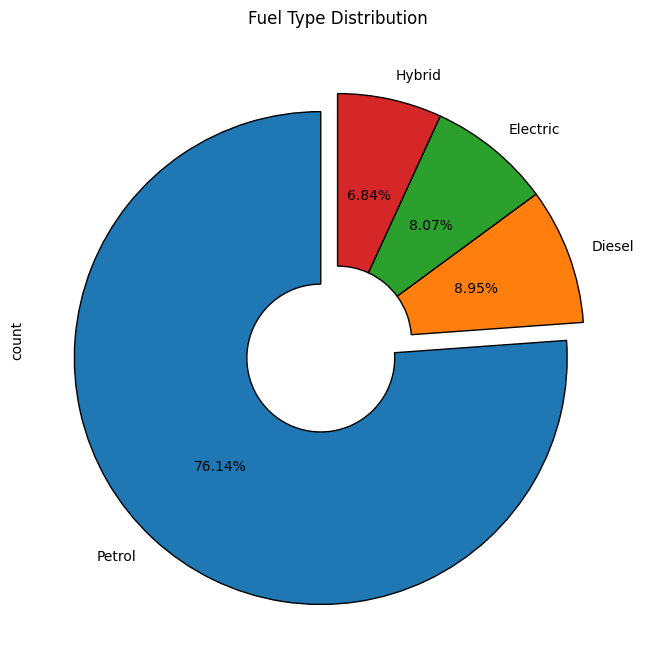

In [40]:
df["Fuel Types"].value_counts().plot(kind="pie",figsize=(8,8),autopct='%.2f%%',startangle=90,
                                     title="Fuel Type Distribution",
                                     explode=[0.1,0,0,0],
                                     wedgeprops={"edgecolor":"black","linewidth":1,"width":.7}
                                        )

##### - - Petrol’s dominance suggests that internal combustion engines (ICE) still rule the roads, likely due to affordability, infrastructure, and availability.
##### - Diesel’s decline may reflect stricter emissions norms (e.g., BS-VI in India), urban restrictions, and shifting consumer sentiment.
##### - Electric vehicles (EVs) are gaining traction, but the 8.07% share shows that adoption is still in early stages—possibly limited by charging infrastructure and upfront costs.
##### - Hybrid vehicles represent a bridge technology, appealing to consumers who want fuel efficiency without full EV commitment.

#### 📈 Strategic Opportunities
##### - Policy makers can use this data to target subsidies or infrastructure investment where adoption is lagging.
##### - Automotive manufacturers might focus on hybrid and EV innovation to capture the growing eco-conscious market.



### Categorising the data frames based on Fuel Types

In [41]:
df_electric=df.copy()
df_petrol=df.copy()
df_diesel=df.copy()
df_hybrid=df.copy()

del df_electric["Displacement(CC)"]

In [42]:
df_electric=df_electric[df_electric["Fuel Types"]=="Electric"]
df_petrol=df_petrol[df_petrol["Fuel Types"]=="Petrol"]
df_diesel=df_diesel[df_diesel["Fuel Types"]=="Diesel"]
df_hybrid=df_hybrid[df_hybrid["Fuel Types"]=="Hybrid"]


### Displacement Distribution By Fuel Types

Text(0.5, 0, 'Hybrid Cars')

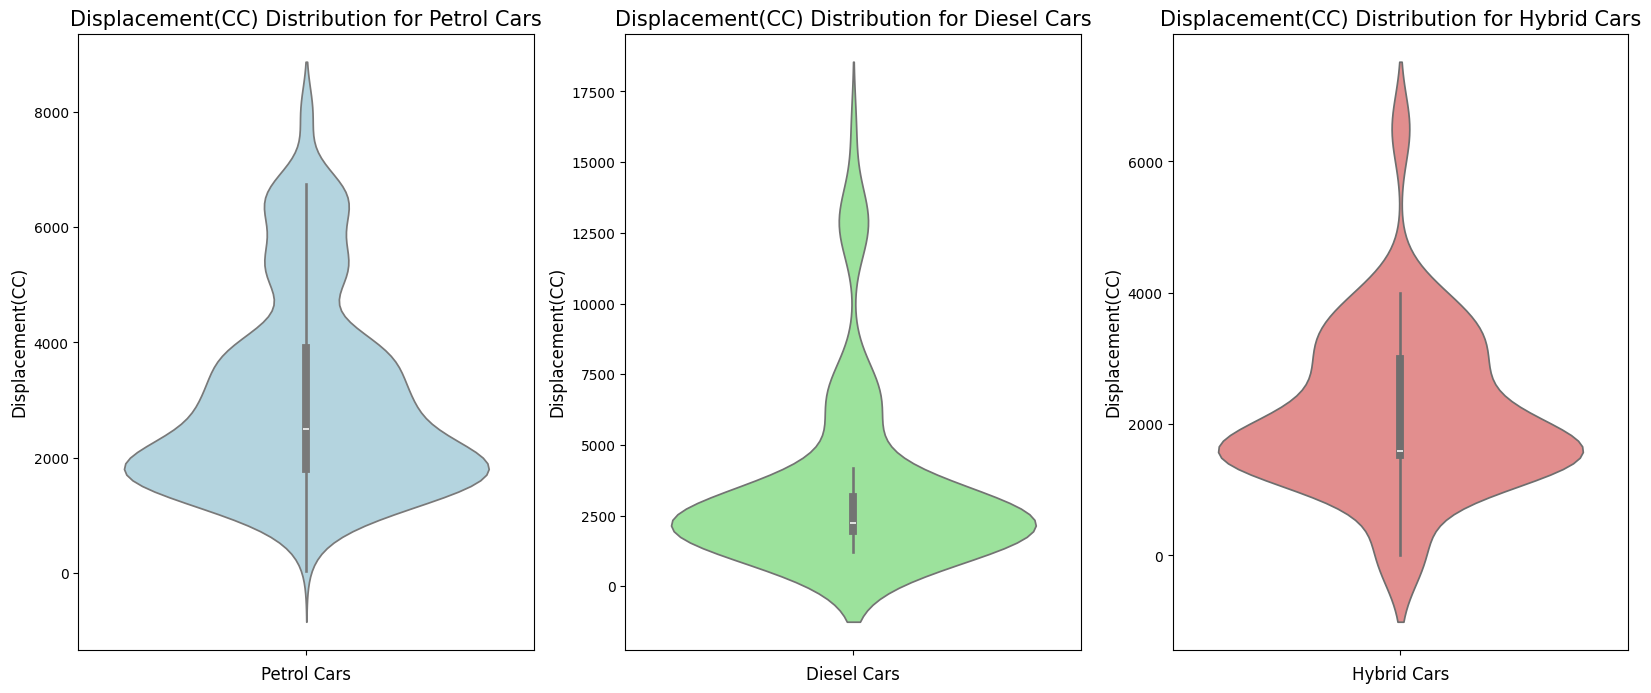

In [43]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.violinplot(data=df_petrol,y="Displacement(CC)",ax=axes[0],color="lightblue")
axes[0].set_title("Displacement(CC) Distribution for Petrol Cars",fontsize=15)
axes[0].set_ylabel("Displacement(CC)",fontsize=12)
axes[0].set_xlabel("Petrol Cars",fontsize=12)

sns.violinplot(data=df_diesel,y="Displacement(CC)",ax=axes[1],color="lightgreen")
axes[1].set_title("Displacement(CC) Distribution for Diesel Cars",fontsize=15)
axes[1].set_ylabel("Displacement(CC)",fontsize=12)  
axes[1].set_xlabel("Diesel Cars",fontsize=12)

sns.violinplot(data=df_hybrid,y="Displacement(CC)",ax=axes[2],color="lightcoral")
axes[2].set_title("Displacement(CC) Distribution for Hybrid Cars",fontsize=15)
axes[2].set_ylabel("Displacement(CC)",fontsize=12)  
axes[2].set_xlabel("Hybrid Cars",fontsize=12)

#### - Hybrid Vehicles:
#####   Have relatively low displacement values, suggesting a design focus on fuel economy and emissions reduction. Their narrow distribution implies standardization around smaller, efficient engines supplemented by electric motors.
#### - Diesel Engines: 
#####   Exhibit the widest and highest displacement range, indicating their use in torque-heavy applications like trucks and SUVs. This reflects diesel’s role in utility and long-haul performance, where larger engines are common.
#### - Petrol Engines: 
#####   Span a broad range but generally center around mid-level displacements. This diversity suggests petrol engines serve both economy and performance segments, from compact cars to high-performance sports models.


#### Checking the outliers in Petrol

In [44]:
fig=px.box(data_frame=df_petrol,y="Displacement(CC)",title="Displacement(CC) Distribution for Petrol Cars")
fig.show()

In [45]:
df_petrol[df_petrol["Displacement(CC)"]<500]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
275,Volkswagen,Up!,Electric,32.3 kWh,82.0,160.0,13.0,15000.0,Petrol,4,95,32.3,False,NaN
1182,Mazda,Carol P360,0.36L Inline-2,360 cc,26.0,85.0,35.0,8000.0,Petrol,4,45,360.0,False,NaN


In [46]:
df_petrol.drop(index=275,axis=0,inplace=True)
df_petrol.reset_index(drop=True,inplace=True)

#### Finding the Outliers Using IQR

#### Outliers for the petrol vehicle

In [47]:
Q1=df_petrol["Displacement(CC)"].quantile(0.25)
Q3=df_petrol["Displacement(CC)"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_petrol_outliers=df_petrol[(df_petrol["Displacement(CC)"]<lower_bound) | (df_petrol["Displacement(CC)"]>upper_bound)]
print(f"Outlier data points based on IQR method: {len(df_petrol_outliers)}")

Outlier data points based on IQR method: 11


##### During my analysis of engine displacement data, I identified 11 outliers. Although these values deviate significantly from the norm, they are not erroneous and represent important edge cases. To preserve their analytical value without distorting the overall trends, I chose to separate them from the main dataset rather than remove them.

In [48]:
df_petrol_without_outliers=df_petrol[(df_petrol["Displacement(CC)"]>=lower_bound) & (df_petrol["Displacement(CC)"]<=upper_bound)]
df_petrol_without_outliers.head(5)

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
0,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900,6749.0,False,NaN
1,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100,1200.0,False,NaN
2,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900,3982.0,False,NaN
3,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560,5204.0,False,NaN
4,BMW,Mclaren 720s,V8,"3,994 cc",710.0,341.0,2.9,499000.0,Petrol,2,770,3994.0,False,NaN


In [49]:
fig=make_subplots(rows=1, cols=2, subplot_titles=("Without Outliers", " Outlier Data Points"))
fig.add_trace(go.Box(y=df_petrol_without_outliers["Displacement(CC)"], name="Without Outliers"), row=1, col=1)
fig.add_trace(go.Box(y=df_petrol_outliers["Displacement(CC)"], name="Outlier Data Points"), row=1, col=2)
fig.update_layout(title_text="Displacement(CC) Distribution for Petrol Cars - With and Without Outliers", showlegend=False)

#fig=px.box(data_frame=df_petrol_without_outliers,y="Displacement(CC)",title="Displacement(CC) Distribution for Petrol Cars")
fig.show()

#### Checking For the Outliers in Diesel Vehicle

In [50]:
fig=px.box(df_diesel,y="Displacement(CC)",title="Displacement(CC) Distribution for Diesel Cars")
fig.show()

##### Outliers for the Diesel vehicle based on Displacement

In [51]:
Q1=df_diesel["Displacement(CC)"].quantile(0.25)
Q3=df_diesel["Displacement(CC)"].quantile(0.75)
IQR=Q3-Q1   
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_diesel_outliers=df_diesel[(df_diesel["Displacement(CC)"]<lower_bound) | (df_diesel["Displacement(CC)"]>upper_bound)]
print(f"Outlier data points based on IQR method: {len(df_diesel_outliers)}")

Outlier data points based on IQR method: 19


In [52]:
df_diesel_without_outliers=df_diesel[(df_diesel["Displacement(CC)"]>=lower_bound) & (df_diesel["Displacement(CC)"]<=upper_bound)]
df_diesel_without_outliers.head(5)

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc,Fuel_Diesel
151,BMW,116D,I3,"1,496 cc",116.0,200.0,10.3,30000.0,Diesel,5,280,1496.0,False,Diesel
152,BMW,120D XDRIVE,I4,"1,995 cc",190.0,230.0,6.9,38000.0,Diesel,5,400,1995.0,False,Diesel
154,BMW,118D,I4,"1,995 cc",150.0,216.0,8.4,34000.0,Diesel,5,380,1995.0,False,Diesel
157,BMW,114D,I3,"1,496 cc",95.0,185.0,12.2,27000.0,Diesel,5,270,1496.0,False,Diesel
159,BMW,125D,I4,"1,995 cc",224.0,240.0,6.3,44000.0,Diesel,5,400,1995.0,False,Diesel


In [53]:
fig=make_subplots(rows=1, cols=2, subplot_titles=("Without Outliers", " Outlier Data Points"))
fig.add_trace(go.Box(y=df_diesel_without_outliers["Displacement(CC)"], name="Without Outliers"), row=1, col=1)
fig.add_trace(go.Box(y=df_diesel_outliers["Displacement(CC)"], name="Outlier Data Points"), row=1, col=2)
fig.update_layout(title_text="Displacement(CC) Distribution for Petrol Cars - With and Without Outliers", showlegend=False)

#fig=px.box(data_frame=df_petrol_without_outliers,y="Displacement(CC)",title="Displacement(CC) Distribution for Petrol Cars")
fig.show()

##### During my analysis of engine displacement data, I identified 19 outliers. Although these values deviate significantly from the norm, they are not erroneous and represent important edge cases. To preserve their analytical value without distorting the overall trends, I chose to separate them from the main dataset rather than remove them

In [54]:
fig=px.histogram(df,x="Price(in USD)",nbins=10,title="Price(in USD) Distribution for All Cars",
                 color="Fuel Types",barmode="group",
                 marginal="box") 
fig.update_layout(bargap=0.1,height=600,width=900)
fig.show()  

#### Vehicle Pricing by Make, Model, and Fuel Type

In [55]:
fig=px.treemap(df,path=["Make","Model"],values="Price(in USD)",
               color="Fuel Types")
fig.show()

#### Vehicle Specs for Cars with Displacement(CC) above 4000 CC

In [56]:
df_4000=df[df["Displacement(CC)"]>4000]
fig=px.scatter(data_frame=df_4000
               ,x="Displacement(CC)",y="HorsePower",color="Make",
               size="Price(in USD)",hover_data=["Model","Fuel Types"])
fig.update_layout(title="Vehicle Specs for Cars with Displacement(CC) > 4000",
                   height=700,width=1000)

fig.show()

#### --High-displacement engines (above 4000 CC) are strongly correlated with higher horsepower, especially among luxury and performance-oriented brands like Ferrari, Lamborghini, Rolls Royce, and Bugatti. These brands dominate the upper-right quadrant of the plot, indicating:
##### - Aggressive power tuning: Their engines are not just large—they're engineered for maximum output.
##### - Brand identity alignment: High horsepower reinforces their image of speed, prestige, and exclusivity.
##### - Trade-off with efficiency: These vehicles likely sacrifice fuel economy and emissions compliance for performance, which has implications for policy and sustainability.
#### --Meanwhile, brands like Toyota, Volvo, and Ford appear with smaller point sizes and more moderate horsepower, suggesting fewer high-displacement models and a more balanced approach between power and practicality.


In [57]:
df_model=df["Make"].value_counts()
fig=px.line(df_model.head(20),x=df_model.head(20).index,y=df_model.head(20).values,
          )
fig.update_traces(mode="markers+lines")
fig.update_layout(title="Top 20 Car Manufacturers by Number of Models",
                  xaxis_title="Car Manufacturers",  yaxis_title="Number of Models",
                  height=600,width=1000
                  )
fig.show()

In [58]:
del df["Fuel_Diesel"]
df

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900,6749.0,False
2,Ford,KA+,1.2L Petrol,"1,200 cc",70.0,165.0,10.5,12000.0,Petrol,5,100,1200.0,False
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900,3982.0,False
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560,5204.0,False
5,BMW,Mclaren 720s,V8,"3,994 cc",710.0,341.0,2.9,499000.0,Petrol,2,770,3994.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Mazda,Luce Rotary Coupe,1.3L Wankel Rotary Engine,"1,308 cc",135.0,175.0,12.0,25000.0,Petrol,4,180,1308.0,False
1196,Mazda,Millenia S,2.5L V6,"2,500 cc",200.0,220.0,8.0,30000.0,Petrol,5,250,2500.0,False
1197,Mazda,787B (Race Car),2.6L Wankel Rotary Engine,"2,620 cc",700.0,320.0,3.5,5000000.0,Petrol,1,500,2620.0,False
1199,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.0,180.0,6.8,50000.0,Hybrid,7,630,2393.0,False


In [59]:
df[df["Displacement(CC)"]==np.max(df["Displacement(CC)"])]

,Make,Model,Engines,CC/Battery Capacity,HorsePower,Top Speed(Km/h),Acceleration(0-100 Km/h in sec),Price(in USD),Fuel Types,Seats,Torque(Nm),Displacement(CC),Horsepower_has_cc
884,Volvo,Volvo FH16,16.1L I6 Turbo Diesel,16100 cc,750.0,120.0,14.5,160000.0,Diesel,2,3500,16100.0,False


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HorsePower,1140.0,303.707018,212.390202,1.0,150.0,255.0,400.000,1850.0
Top Speed(Km/h),1140.0,218.166667,53.197202,80.0,180.0,209.0,250.000,500.0
Acceleration(0-100 Km/h in sec),1140.0,7.509474,3.333489,1.9,5.2,7.0,9.425,35.0
Price(in USD),1140.0,142337.104386,727263.396169,4000.0,28000.0,43400.0,72926.250,18000000.0
Torque(Nm),1140.0,430.786842,295.436376,1.0,250.0,366.0,560.000,3500.0
Displacement(CC),1140.0,2789.738070,1961.496715,11.4,1589.5,2179.0,3600.000,16100.0


In [61]:

fig=px.box(data_frame=df,y="Displacement(CC)")
fig.show()

In [63]:
df_electric.describe().T

,count,mean,std,min,25%,50%,75%,max
HorsePower,92.0,344.554348,211.614535,1.0,200.0,320.0,450.500,830.0
Top Speed(Km/h),92.0,194.206522,46.757861,120.0,160.0,190.0,226.250,402.0
Acceleration(0-100 Km/h in sec),92.0,5.841304,2.558251,1.9,4.0,5.1,7.325,15.0
Price(in USD),92.0,69211.467391,38112.791229,11000.0,40810.0,59997.5,90125.000,200000.0
Torque(Nm),92.0,444.923913,269.224659,1.0,305.0,377.5,620.000,1051.0


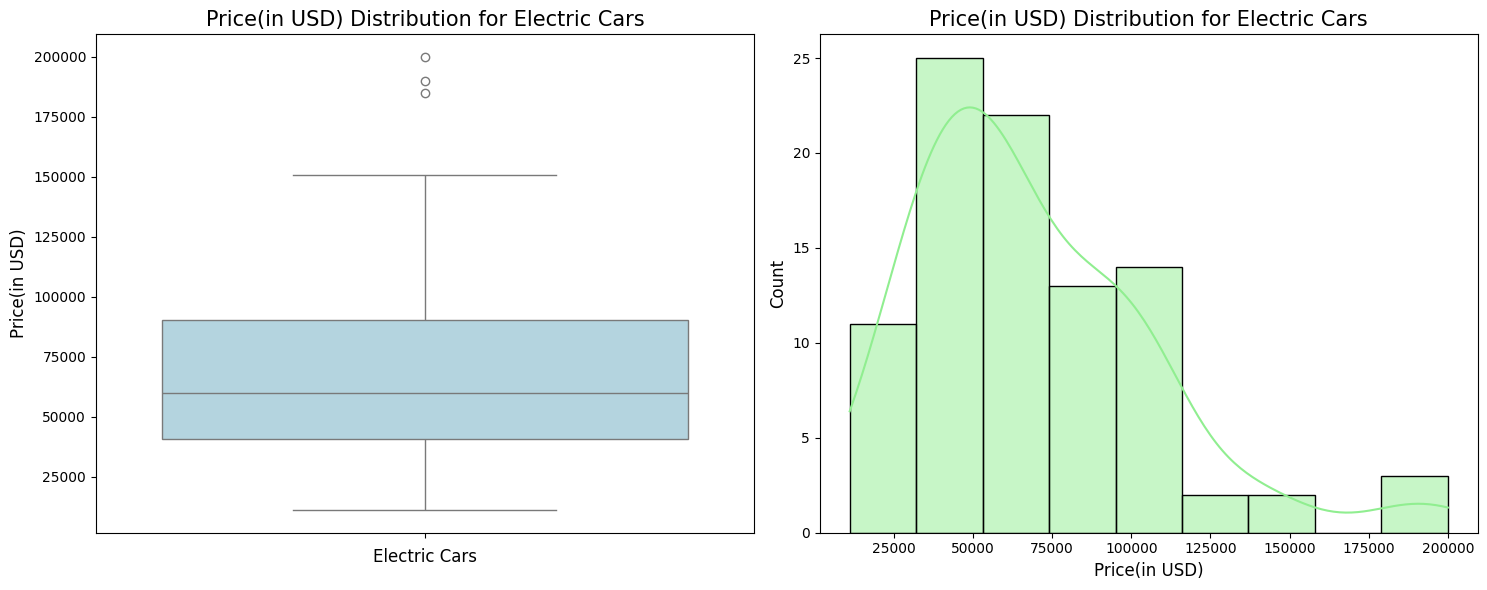

In [64]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(data=df_electric,y="Price(in USD)",color="lightblue",ax=axes[0])
axes[0].set_title("Price(in USD) Distribution for Electric Cars",fontsize=15)
axes[0].set_ylabel("Price(in USD)",fontsize=12)
axes[0].set_xlabel("Electric Cars",fontsize=12) 


sns.histplot(df_electric["Price(in USD)"],kde=True,ax=axes[1],color="lightgreen")
axes[1].set_title("Price(in USD) Distribution for Electric Cars",fontsize=15)
axes[1].set_ylabel("Count",fontsize=12)
axes[1].set_xlabel("Price(in USD)",fontsize=12)
plt.tight_layout()




##### -  Around $75,000, indicating that electric cars tend to be positioned in the premium segment.
##### - Spanning roughly $50,000 to $100,000, showing where most electric car prices fall.
##### - The high median and wide IQR suggest that electric vehicles are generally more expensive than diesel or petrol counterparts.
##### - While the EV market includes ultra-premium models, the majority of electric cars are priced within reach of upper-middle-class buyers.
##### 


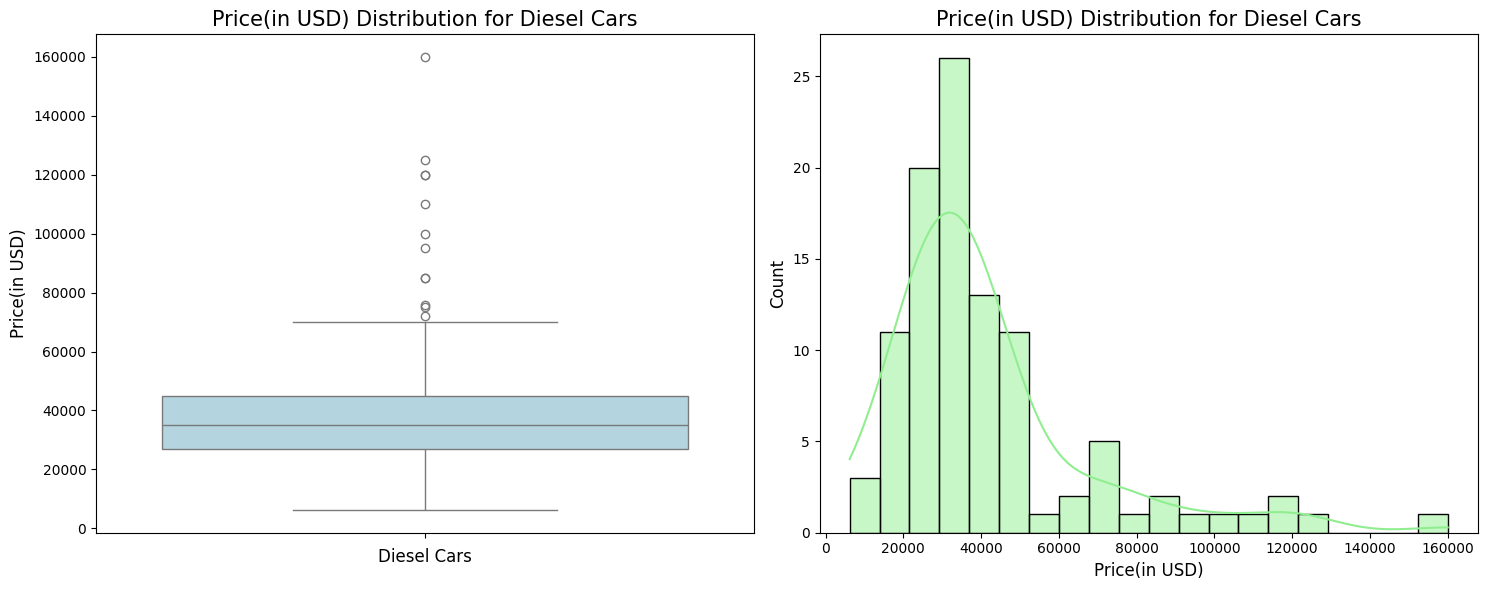

In [65]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.boxplot(data=df_diesel,y="Price(in USD)",color="lightblue",ax=axes[0])
axes[0].set_title("Price(in USD) Distribution for Diesel Cars",fontsize=15)
axes[0].set_ylabel("Price(in USD)",fontsize=12)
axes[0].set_xlabel("Diesel Cars",fontsize=12) 


sns.histplot(df_diesel["Price(in USD)"],kde=True,ax=axes[1],color="lightgreen")
axes[1].set_title("Price(in USD) Distribution for Diesel Cars",fontsize=15)
axes[1].set_ylabel("Count",fontsize=12)
axes[1].set_xlabel("Price(in USD)",fontsize=12)
plt.tight_layout()

##### --- The presence of multiple outliers suggests a subset of premium diesel vehicles—likely SUVs or luxury models.
##### --- The compact box indicates that most diesel cars are priced within a relatively narrow band, reinforcing affordability

##### --- Most vehicles are priced in the lower-to-mid range.
##### --- A few vehicles are priced very high, pulling the tail to the right.
##### --- Diesel cars are clustered in the mid-price segment, likely reflecting their role in utility and fuel efficiency
####  --- The tail confirms the box plot’s outliers—high-priced diesel models that are rare but impactful.







In [ ]:
del df["Horsepower_has_cc"]

<Axes: >

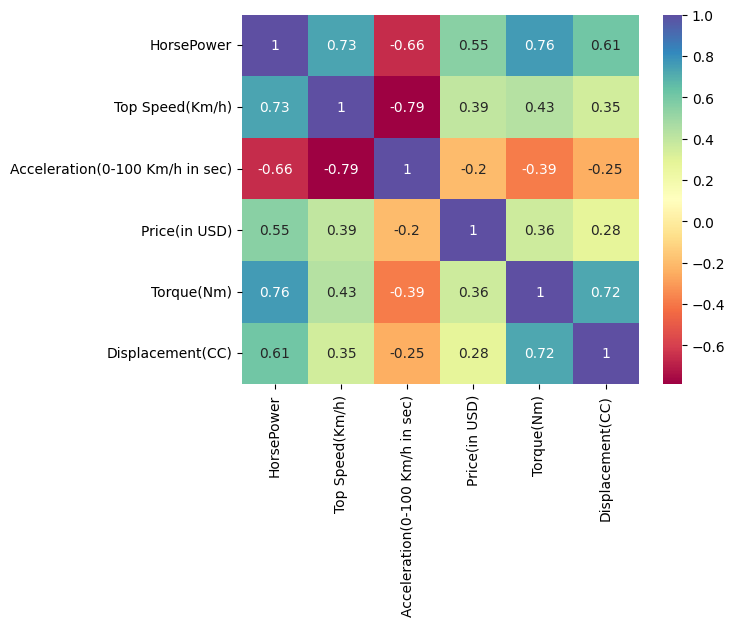

In [95]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Spectral")

##### - HorsePower ↔ Top Speed (0.73): More horsepower generally means higher top speed—classic performance alignment.
##### - Torque ↔ Displacement (0.72): Larger engines produce more torque, confirming mechanical expectations.
##### - Acceleration ↔ HorsePower (-0.66): Faster cars (lower acceleration time) tend to have higher horsepower.
##### - Acceleration ↔ Top Speed: Also likely negative, reinforcing that high-speed vehicles accelerate quicker.
##### - Price ↔ HorsePower / Torque: Moderate positive correlations suggest that performance influences price, but not exclusively.
##### - Branding, fuel type, and tech features likely contribute to pricing beyond raw specs.




<Axes: >

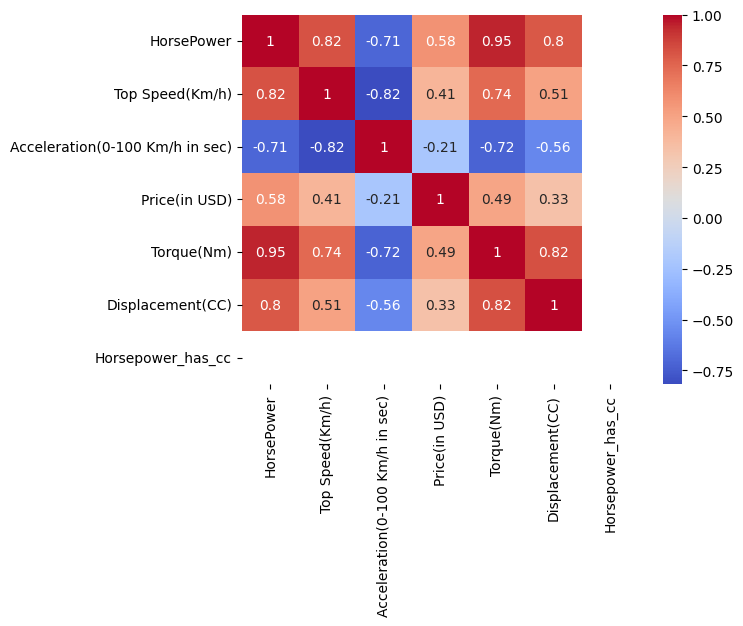

In [90]:
sns.heatmap(df_petrol.corr(numeric_only=True),annot=True,cmap="coolwarm")

##### - HorsePower ↔ Torque (0.95): Nearly perfect correlation—more horsepower almost always means more torque.
##### - HorsePower ↔ Displacement (0.94): Larger engines tend to produce more power.
##### - HorsePower ↔ Top Speed (0.82): High horsepower contributes directly to higher top speeds.
#### These relationships confirm engineering principles—larger engines yield more torque and speed, reinforcing performance design logic.
##### - Acceleration ↔ Top Speed (-0.82) and Acceleration ↔ HorsePower (-0.71):- Lower acceleration time (i.e., faster acceleration) is associated with higher horsepower and top speed.- This inverse relationship is expected: faster cars accelerate quicker.
#### Acceleration time is a performance metric that inversely reflects power—so negative correlations here are meaningful and desirable.
##### - Price ↔ HorsePower (0.54) and Price ↔ Torque (0.57):- While performance drives price to some extent, luxury and tech features likely play a major role in premium pricing.



<Axes: >

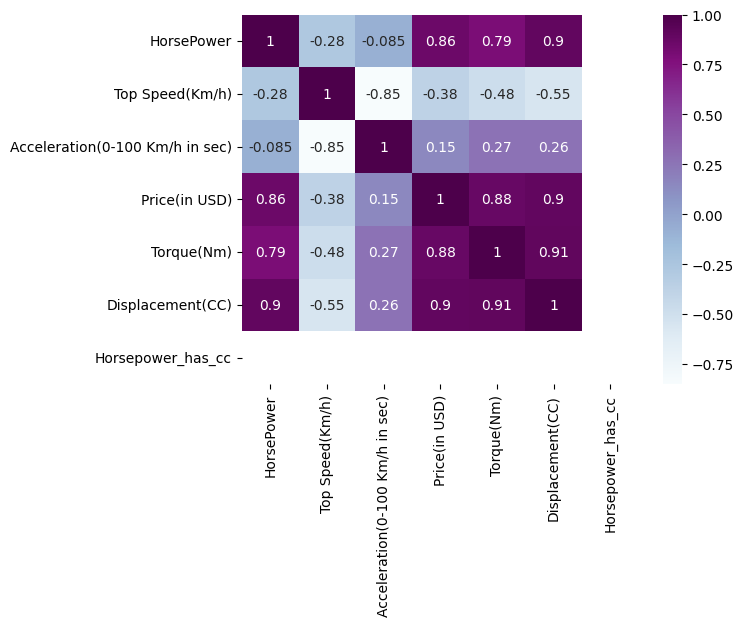

In [98]:
sns.heatmap(df_diesel.corr(numeric_only=True),annot=True,cmap="BuPu")

##### - HorsePower ↔ Torque (0.91) and HorsePower ↔ Displacement (0.90):- These near-perfect correlations confirm that engine size and torque are tightly coupled with power output.
##### - Horsepower_has_cc ↔ Displacement (0.87):- This derived feature is behaving as expected—strongly aligned with engine size.
##### - Acceleration ↔ HorsePower (-0.85):- Lower acceleration times (i.e., faster cars) are strongly associated with higher horsepower.
##### Acceleration shows a strong negative correlation with top speed and torque, indicating that higher performance specifications tend to reduce acceleration time. This relationship is further influenced by the inclusion of large-displacement diesel vehicles—such as heavy-duty trucks—which typically have high torque but slower acceleration due to their mass and design purpose.




<Axes: >

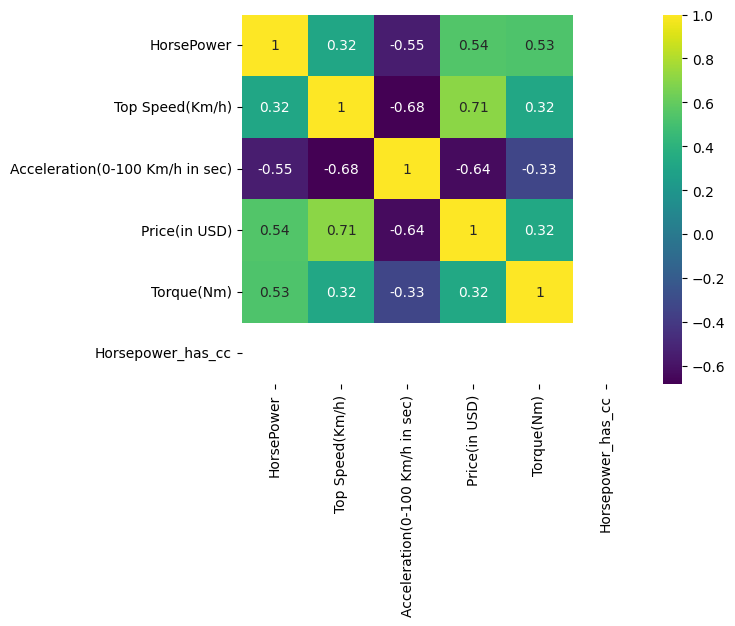

In [100]:
sns.heatmap(df_electric.corr(numeric_only=True),annot=True,cmap="viridis")

##### - HorsePower ↔ Price (0.54): Moderate positive correlation—higher horsepower tends to increase vehicle price, but not exclusively.
##### - HorsePower ↔ Acceleration (-0.55): Negative correlation—more horsepower leads to faster acceleration (lower time), as expected.
##### - HorsePower ↔ Top Speed (0.32): Mild positive correlation—suggests that while horsepower contributes to top speed, other factors (like aerodynamics and drivetrain) also play a role.
##### - Top Speed ↔ Acceleration (-0.68): Strong negative correlation—vehicles with higher top speeds tend to accelerate faster.
##### - Top Speed ↔ Price (0.71): Strong positive correlation—premium pricing is often tied to high-speed capability, reflecting performance branding.

##### - Torque ↔ Acceleration (-0.64): Strong negative correlation—higher torque improves acceleration.
- This is especially relevant for diesel and electric vehicles, which often deliver high torque at low RPMs.

##### - Price ↔ Torque (0.32) and Price ↔ Horsepower_has_cc (0.53): These moderate correlations suggest that derived features and raw specs both contribute to pricing, but branding and tech features likely amplify the effect.


###### This heatmap reveals that performance metrics like horsepower, torque, and top speed are moderately to strongly tied to price, but not in isolation. Acceleration acts as a sensitive inverse indicator of power, and derived features like Horsepower_has_cc help capture nuanced relationships.

